In [9]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,time
import import_ipynb
from Group_Project_ETL_code import *

In [12]:
# Instantiating an object of the 'Credit_Card_Data' class
data_obj = Credit_Card_Data('hello','', 'E:\Courses\Albany Beck\Group Project/fraudTest.csv')

In [13]:
# Creating a Dataframe... post cleaning the 'csv' data file
df = data_obj.data_cleaning_df()

In [14]:
# Creating a subset of the main Dataframe to carry the data of 'Non-Fraudulent' Customers only
df_non_fraud = df.query('Fraud == "No"').reset_index()

In [15]:
# Creating a subset of the main Dataframe to carry the data of 'Fraudulent' Customers only
df_fraud = df.query('Fraud == "Yes"').reset_index()

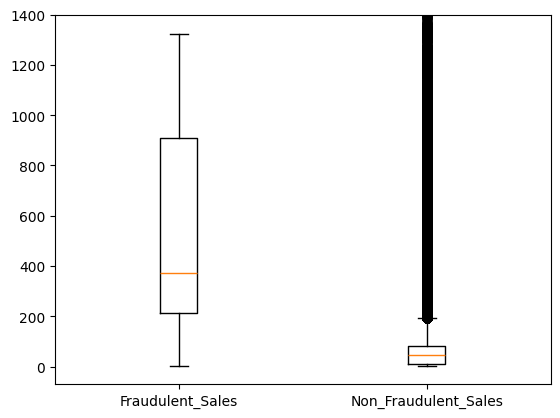

In [16]:
# Creating a box plot to show the amount spend by fraudulent and non-fraudulent customers
combined_data = [df_fraud['Amount-USD'], df_non_fraud['Amount-USD']]
plt.ylim(-70,1400)
plt.boxplot(combined_data, labels=['Fraudulent_Sales', 'Non_Fraudulent_Sales'])
plt.show()

In [17]:
# Having a look at the 'Fraud' and 'Non-Fraud' Customers dataframes
# To specifically see the quartiles of their expenditure
df_non_fraud['Amount-USD'].describe()
df_fraud['Amount-USD'].describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: Amount-USD, dtype: float64

In [18]:
# Creating an extra column in the Fraudulent customers dataframe to calculate the age of the customers
df_fraud['Age'] = 'NaN'
for i in range(len(df_fraud)):
    df_fraud['Age'][i] = df_fraud['Transaction_Date'][i].year - df_fraud['Date_Of_Birth'][i].year

C:\Users\charl\AppData\Local\Temp\ipykernel_40616\81368238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud['Age'][i] = df_fraud['Transaction_Date'][i].year - df_fraud['Date_Of_Birth'][i].year
C:\Users\charl\AppData\Local\Temp\ipykernel_40616\81368238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud['Age'][i] = df_fraud['Transaction_Date'][i].year - df_fraud['Date_Of_Birth'][i].year
C:\Users\charl\AppData\Local\Temp\ipykernel_40616\81368238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

In [19]:
# Creating another column in the fraud customers df to put each customer in a group in accordance with their age
df_fraud.loc[df_fraud['Age'].between(18,30), 'Age_Group'] = '18-30'
df_fraud.loc[df_fraud['Age'].between(31,40), 'Age_Group'] = '31-40'
df_fraud.loc[df_fraud['Age'].between(41,50), 'Age_Group'] = '41-50'
df_fraud.loc[df_fraud['Age'].between(51,60), 'Age_Group'] = '51-60'
df_fraud.loc[df_fraud['Age'].between(61,70), 'Age_Group'] = '61-70'
df_fraud.loc[df_fraud['Age'].between(71,80), 'Age_Group'] = '71-80'
df_fraud.loc[df_fraud['Age'].between(81,90), 'Age_Group'] = '81-90'
df_fraud.loc[df_fraud['Age'].between(91,100), 'Age_Group'] = '91-100'

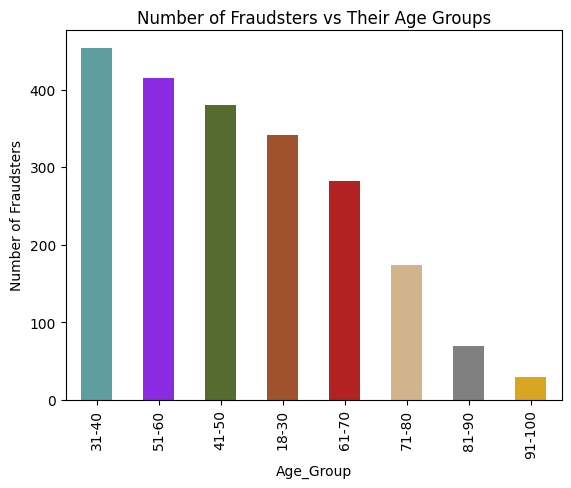

In [20]:
# Creating a bar plot to calculate how many fraudulent customers fall in each age-group
df_fraud['Age_Group'].value_counts()[df_fraud.Age_Group.unique()].sort_values(ascending=False).plot(kind='bar',color = ['cadetblue', 'blueviolet', 'darkolivegreen', 'sienna', 'firebrick','tan','gray','goldenrod'])
plt.title(label='Number of Fraudsters vs Their Age Groups',
          fontweight=10,
          pad='5.0')
plt.ylabel('Number of Fraudsters')
plt.xlabel('Age_Group')
plt.show()